<a href="https://colab.research.google.com/github/FelipePinheiro964/PUCRS---Fase-2---Steam-Games/blob/main/PUCRS_Fase_2_Steam_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*TRABALHO DE PROGRAMAÇÃO PARA DADOS*

_NOME:_ Felipe Pinheiro Fossá -
_CURSO:_ Banco de Dados: ênfase em data Analytics

Digite o nome do arquivo: steam_games.csv
Digite o número da questão: 5


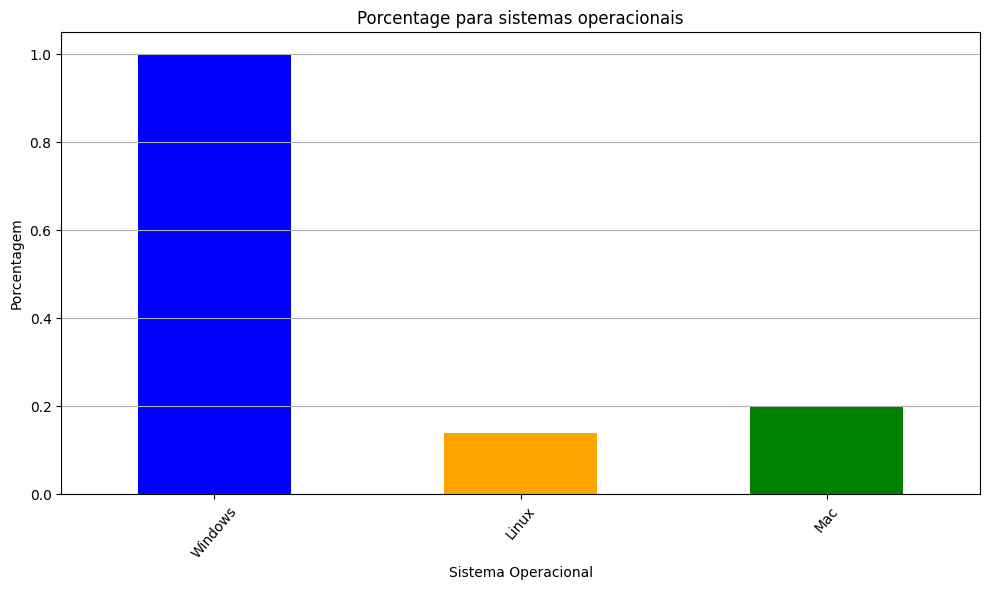

In [38]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#seleção de arquivo
f = input('Digite o nome do arquivo: ')

#finalização forçada
if str.lower(f) == 'sair':
  print('Saindo...')
  sys.exit('O sistema foi finalizado pelo usuario, inicie novamente para outro uso.')
else:
  tabela = pd.read_csv(f, sep=",")
  if tabela.empty:
    print('Arquivo vazio.')

match input('Digite o número da questão: '):
  case '0':
    print('Saindo...')
    sys.exit('O sistema foi finalizado pelo usuario, inicie novamente para outro uso.')
  case '1': #questão 1
    try:

      questao_1 = tabela[['Name', 'Metacritic score', 'Release date']]

      if questao_1['Release date'].duplicated().any():
        questao_1_order = questao_1.sort_values(by= 'Release date' and 'Metacritic score', ascending=True)# Mostra os 10 maiores
        display(questao_1_order.tail(n=10))                                                               #false mostrava os 10 menores

      else:

        questao_1_10 = questao_1.copy()
        top_10_notas = questao_1_10.nlargest(10, 'Metacritic score').sort_values(by='Metacritic score', ascending=False) # mostra os maiores por ter poucos dados
        display(top_10_notas.tail(n=10))

    except FileNotFoundError:
      print('Digite um nome válido')

  case '2':
        #try:
          tabela_copy = tabela.copy() #cria uma copia da tabela
          mask = tabela_copy['Genres'].str.contains('RPG', case=False, na=False) #procura todos os generos RPG
          RPG = tabela_copy[mask] #cria uma variavel RPG para facilitar leitura
          RPG = RPG.dropna(subset=['Genres']) #retiro qualquer genero None presente
          print('Neste arquivo, temos:')
          display(RPG)
          #Media e maximo de DLCs no genero
          print()

          #DLCs do Genero RPG
          max_DLC = RPG['DLC count'].max() #mostra o maior valor de DLCs
          print(f'Para o genero RPG, temos {max_DLC:.2f} DLCs')

          media_DLC = RPG['DLC count'].mean()
          print(f'Em media, temos {media_DLC:.2f} DLCs presentes nesta categoria')

          print()

          #Media e maxima de avaliaçoes positivas
          max_positivas = RPG['Positive'].max() #mostra o maior valor de DLCs
          print(f'Para o genero RPG, temos {max_positivas:.2f} avalições positivas')

          media_positivas = RPG['Positive'].mean()
          print(f'Em media, temos {media_positivas:.2f} avalições positivas presentes nesta categoria')

          print()

          #Media e maxima de avaliaçoes positivas
          max_negativas = RPG['Negative'].max() #mostra o maior valor de DLCs
          print(f'Para o genero RPG, temos {max_negativas:.2f} avalições negativas')

          media_negativas = RPG['Negative'].mean()
          print(f'Em media, temos {media_negativas:.2f} avalições negativas presentes nesta categoria')
          #screenshots e filmes a ver

  case '3':

## 5 empresas com mais publi
    tabela_copy = tabela.copy()
    empresas = tabela_copy['Publishers'].value_counts()
    top5_empresas = empresas.head(5)

    top5_empresas_index = empresas.head(5).index

    top5_empresas_pagos = tabela_copy[

        (tabela_copy['Publishers'].isin(top5_empresas_index)) &
        (tabela_copy['Price'] > 0)

    ]


    media_positivas = top5_empresas_pagos.groupby('Publishers')['Positive'].mean()

    mediana_positivas = top5_empresas_pagos.groupby('Publishers')['Positive'].median()

    display(top5_empresas)
    display(media_positivas)
    display(mediana_positivas)

  case '4':

    tabela_copy = tabela.copy()

    tabela_copy['Release date'] = pd.to_datetime(tabela_copy['Release date'], format='mixed', errors='coerce')


    jogos_2018_2022 = tabela_copy[(tabela_copy['Release date'].dt.year >= 2018) & (tabela_copy['Release date'].dt.year <= 2022)]
    contagem_linux = jogos_2018_2022[jogos_2018_2022['Linux']].groupby(jogos_2018_2022['Release date'].dt.year).size()

    display(contagem_linux)

    crescimento = contagem_linux.diff().dropna()  # Calcula a diferença ano a ano
    cresceu = crescimento > 0  # Verifica se a diferença é positiva


    display(crescimento)


  ###########################
  ######## GRAFICOS #########
  ###########################

  case '5':
    sist_op = tabela.copy()

    contagem_sistemas = {
        'Windows': sist_op['Windows'].sum(),
        'Linux': sist_op['Linux'].sum(),
        'Mac': sist_op['Mac'].sum()
    }

    contagem_sistemas_df = pd.DataFrame(list(contagem_sistemas.items()), columns=['Sistema Operacional', 'Quantidade'])

    total_jogos = len(sist_op)
    contagem_sistemas_df['Porcentagem'] = (contagem_sistemas_df['Quantidade'] / total_jogos)

    ## grafico

    plt.figure(figsize=(10,6))
    contagem_sistemas_df.set_index('Sistema Operacional')['Porcentagem'].plot(kind='bar', color=['blue', 'orange', 'green'])
    plt
    plt.title('Porcentage para sistemas operacionais')
    plt.ylabel('Porcentagem')
    plt.xlabel('Sistema Operacional')
    plt.xticks(rotation=50)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()